In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')

In [120]:
print(df.head())
#Visualização prévia do arquivo, entender de quais tipo de dados se trata

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [121]:
#Pelo print é possível perceber que o arquivo possui dados int como "ORDER NUMBER", "QUANTITYORDERED", "ORDERLINENUMBER";
#Temos dados Float, como "PRICEEACH", "SALES";
# Mas temos também String como "STATUS", "ADRESSLINE1".

In [122]:
print(df.columns)
#Aqui é possível visualizar o nome de cada coluna presente no nosso arquivo

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [123]:
print(df.shape)
#Visualização do tamanho do arquivo, nesse caso se trata de 2823 linhas totais e 25 colunas totais

(2823, 25)


In [124]:
#Listar paises para o qual foi enviado o produto
nomes_paises = list(df['COUNTRY'])
for nome in nomes_paises[:10]:
    print(nome)
#Ao listar os países de venda, foi possível perceber uma alta rotatividade de vendas nos USA

USA
France
France
USA
USA
USA
France
Norway
USA
France


In [125]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [126]:
#Visualização da variedade de produtos e quantas vezes foram vendidos
print(df['PRODUCTLINE'].value_counts())

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64


In [127]:
# Extraindo a coluna de nomes de clientes
nomes_clientes = list(df['CUSTOMERNAME'])
print("Os 5 primeiros clientes na lista são:")
for nome in nomes_clientes[:5]:
    print(nome)

Os 5 primeiros clientes na lista são:
Land of Toys Inc.
Reims Collectables
Lyon Souveniers
Toys4GrownUps.com
Corporate Gift Ideas Co.


In [128]:
# Dicionário: Relacionando cliente com a linha de produto comprada
dicionario_cliente_produto = dict(zip(df['CUSTOMERNAME'][:3], df['PRODUCTLINE'][:3]))
print("Relação cliente-produto:")
print(dicionario_cliente_produto)

Relação cliente-produto:
{'Land of Toys Inc.': 'Motorcycles', 'Reims Collectables': 'Motorcycles', 'Lyon Souveniers': 'Motorcycles'}


In [129]:
# Tupla: Agrupando informações de uma linha específica (a primeira)
primeira_venda = df.iloc[0]
tupla_venda = (primeira_venda['CUSTOMERNAME'], primeira_venda['PRODUCTLINE'], float(primeira_venda['SALES']))
print(tupla_venda)

('Land of Toys Inc.', 'Motorcycles', 2871.0)


In [130]:
#Media de volume de compra
media_quant = df['QUANTITYORDERED'].mean().round()
print(f"A média de volume de compra é: {media_quant}")

# Coluna numérica de interesse
prim_valor = df['QUANTITYORDERED'][0]

# Estrutura condicional para classificar o valor
print(f"A quantidade do primeiro pedido é: {prim_valor}")
if prim_valor > 40:
    print("É um pedido de grande volume.")
elif prim_valor > 20:
    print("É um pedido de volume médio.")
else:
    print("É um pedido de baixo volume.")

A média de volume de compra é: 35.0
A quantidade do primeiro pedido é: 30
É um pedido de volume médio.


In [131]:
media_sale = df['SALES'].mean().round()
print(f"O valor de venda médio é: ${media_sale}")
# Valor de ticket médio

# Laço 'while' para encontrar o primeiro valor acima de um limite
limite = (media_sale)
i = 0
encontrado = False
while i < len(df['SALES']):
    if df['SALES'][i] > limite:
        print(f"\nPrimeiro pedido com valor maior que ${limite} encontrado na linha {i} com o valor: ${df['SALES'][i]}")
        encontrado = True
        break
    i += 1
if not encontrado:
    print(f"\nNenhum pedido com valor maior que ${limite} foi encontrado.")

O valor de venda médio é: $3554.0

Primeiro pedido com valor maior que $3554.0 encontrado na linha 2 com o valor: $3884.34


In [132]:
# Criando um array NumPy a partir da coluna 'SALES'
array_vendas = np.array(df['SALES'])

# Operação vetorizada: simular um aumento de 10% nas vendas
vendas_com_aumento = array_vendas * 1.10

print("5 primeiros valores de vendas originais:")
print(array_vendas[:5])

print("\n5 primeiros valores de vendas com aumento de 10%:")
print(vendas_com_aumento[:5])

# Operação agregada: calcular a média de vendas
media_vendas = array_vendas.mean()
print(f"\nA média de todas as vendas é: ${media_vendas:.2f}")

5 primeiros valores de vendas originais:
[2871.   2765.9  3884.34 3746.7  5205.27]

5 primeiros valores de vendas com aumento de 10%:
[3158.1   3042.49  4272.774 4121.37  5725.797]

A média de todas as vendas é: $3553.89


In [133]:
# Filtrando para ver apenas os pedidos já enviados ('Shipped')
pedidos_enviados = df[df['STATUS'] == 'Shipped']
print("Número de pedidos enviados:{len(pedidos_enviados) }")
print(len(pedidos_enviados))

# Contando o número de pedidos por país
pedidos_pais = df['COUNTRY'].value_counts()
print("\nContagem de pedidos por país:")
print(pedidos_pais.head()) # Mostra os 5 países com mais pedidos

#Contando o número de pedidos por produto
pedidos_produto = df['PRODUCTLINE'].value_counts()
print("\nContagem de pedidos por produto:")
print(pedidos_produto)
# O produto mais vendido é o Classic Cars, seguido de Vintage Cars

# É possível perceber como a maior quantidade de vendas ocorreu nos USA
print("\n")
print("Total de vendas por linha de produto:")
for linha_produto, total_vendas in vendas_por_linha_produto.items():
  print(f"- {linha_produto}: $ {total_vendas:,.2f}")

Número de pedidos enviados:{len(pedidos_enviados) }
2617

Contagem de pedidos por país:
COUNTRY
USA          1004
Spain         342
France        314
Australia     185
UK            144
Name: count, dtype: int64

Contagem de pedidos por produto:
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64


Total de vendas por linha de produto:
- Classic Cars: $ 3,919,615.66
- Motorcycles: $ 1,166,388.34
- Planes: $ 975,003.57
- Ships: $ 714,437.13
- Trains: $ 226,243.47
- Trucks and Buses: $ 1,127,789.84
- Vintage Cars: $ 1,903,150.84


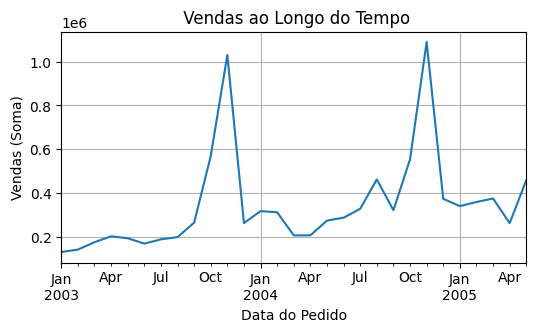

In [134]:
# Convertendo a coluna de data para o formato datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# --- Gráfico de Linha: Vendas ao longo do tempo ---
vendas_data = df.groupby(df['ORDERDATE'].dt.to_period("M"))['SALES'].sum()
vendas_data.plot(kind='line', figsize=(6,3))
plt.title(' Vendas ao Longo do Tempo')
plt.ylabel('Vendas (Soma)')
plt.xlabel('Data do Pedido')
plt.grid(True)
plt.show()

#Os maiores picos de vendas ocorreram nos meses de outobro tanto no ano de 2003 como no ano de 2005

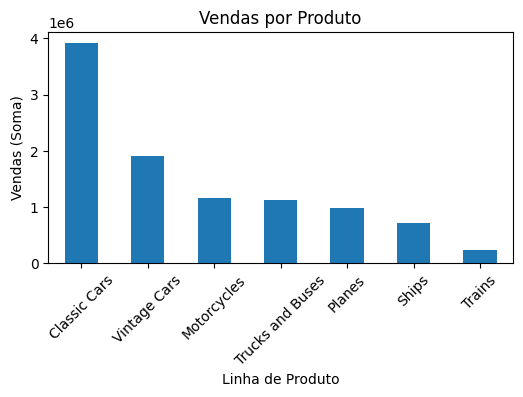

In [135]:
# --- Gráfico de Barras: Total de vendas por linha de produto ---
vendas_por_linha = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
vendas_por_linha.plot(kind='bar', figsize=(6,3))
plt.title('Vendas por Produto')
plt.ylabel('Vendas (Soma)')
plt.xlabel('Linha de Produto')
plt.xticks(rotation=45)
plt.show()

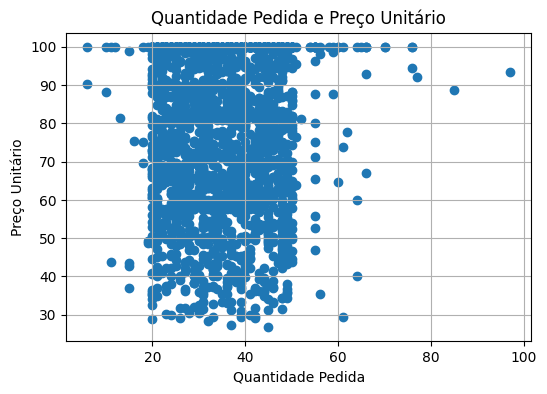

In [136]:
# --- Gráfico de Dispersão: Relação entre quantidade e preço ---
plt.figure(figsize=(6, 4))
plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'])
plt.title('Quantidade Pedida e Preço Unitário')
plt.xlabel('Quantidade Pedida')
plt.ylabel('Preço Unitário')
plt.grid(True)
plt.show()

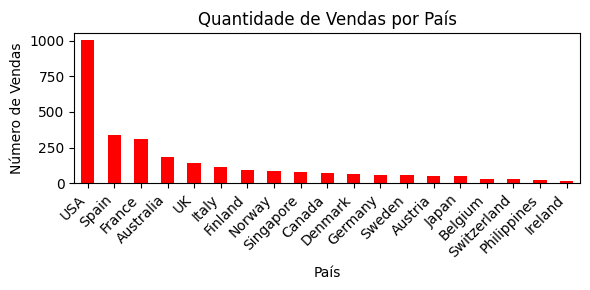

In [137]:
# Vendas por país
vendas_por_pais = df['COUNTRY'].value_counts()

plt.figure(figsize=(6, 3))
vendas_por_pais.plot(kind='bar', color='red')

# 3. Adicionar títulos e rótulos para clareza
plt.title('Quantidade de Vendas por País')
plt.xlabel('País')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos países para não sobrepor
plt.tight_layout() # Ajusta o layout para evitar que os rótulos sejam cortados

plt.show()

# Relatório Final do Projeto Data-Driven Insights

Neste projeto, explorei uma base de dados de vendas com 2823 linhas e 25 colunas. O objetivo foi praticar a manipulação e visualização de dados com Python, utilizando as bibliotecas pandas, NumPy e Matplotlib.

## Principais Descobertas:

* **Perfil de Vendas**: A análise inicial revelou que a maioria dos pedidos tem um volume baixo a médio de itens.
* **Desempenho por Produto**: O gráfico de barras mostrou que a linha de produtos "Classic Cars" é a campeã de vendas, superando significativamente as outras categorias.
* **Tendências Temporais**: O gráfico de linhas indicou uma sazonalidade nas vendas, com picos em determinados meses do ano, especialmente no final do ano (outubro).
* **Relação Preço x Quantidade**: O gráfico de dispersão não mostrou uma correlação forte e clara, indicando que tanto produtos caros quanto baratos podem ser vendidos em diferentes quantidades, sem um padrão óbvio de "quanto mais barato, mais se vende".
* **Distribuição Geográfica**: A contagem de pedidos por país revelou que a maioria dos clientes está localizada nos EUA, seguida por países da Europa como França e Espanha.

Este projeto foi uma excelente oportunidade para aplicar conceitos de análise de dados e praticar as habilidades com python